In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:

uk_gene_df=pd.read_csv("sim_av_gene.csv")
uk_selected_gene_columns=uk_gene_df[["PATIENTID","GENE_DESC","OVERALL_TS","METHODS"]]

uk_tumour_df=pd.read_csv("sim_av_tumour.csv")
uk_selected_tumour_columns = uk_tumour_df[["TUMOURID", "GENDER", "PATIENTID","DIAGNOSISDATEBEST","SITE_ICD10_O2_3CHAR","SITE_ICD10_O2","COMORBIDITIES_27_03"]]

uk_patient_df=pd.read_csv("sim_av_patient.csv")
uk_selected_patient_columns=uk_patient_df[["PATIENTID", "DEATHCAUSECODE_1A","DEATHCAUSECODE_1B","DEATHCAUSECODE_1C","DEATHCAUSECODE_2","DEATHCAUSECODE_2","DEATHCAUSECODE_UNDERLYING","VITALSTATUS","VITALSTATUSDATE"]]

uk_prescription_df=pd.read_csv("sim_rtds_prescription.csv")
uk_selected_prescription_columns=uk_prescription_df[["PATIENTID","RTTREATMENTMODALITY","RTACTUALDOSE","RTPRESCRIBEDDOSE","APPTDATE"]]
uk_combined_df=pd.read_csv("sim_rtds_combined.csv")
uk_selected_combined_columns=uk_combined_df[["PATIENTID","RADIOTHERAPYEPISODEID","APPTDATE"]]
#uk_lookup_table=pd.read_excel("all_z_lookup_tables.xlsx")
file_path = 'all_z_lookup_tables.xlsx'
sheet_name = 'zicd'
icd_sheet = pd.read_excel(file_path, sheet_name=sheet_name)

C:\Users\poonam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\poonam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\poonam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [58]:
uk_selected_prescription_columns

,PATIENTID,RTTREATMENTMODALITY,RTACTUALDOSE,RTPRESCRIBEDDOSE,APPTDATE
0,10000008,5.0,35.0,35.0,2018-08-11
1,10000008,5.0,35.0,35.0,2018-08-12
2,10000008,5.0,35.0,35.0,2018-08-13
3,10000008,5.0,35.0,35.0,2018-08-17
4,10000008,5.0,35.0,35.0,2018-08-18
...,...,...,...,...,...
5843637,250002502,5.0,8.0,8.0,2022-07-24
5843638,250002502,5.0,8.0,8.0,2022-07-25
5843639,250002502,5.0,8.0,8.0,2022-07-26
5843640,250002502,5.0,8.0,8.0,2022-07-27


In [14]:
print(icd_sheet)



     Code                       Description
0     A41                               A41
1       C                                 C
2      C0                                C0
3     C00         MALIGNANT NEOPLASM OF LIP
4    C000                EXTERNAL UPPER LIP
..    ...                               ...
939   O71                               O71
940   O90                               O90
941   O91                               O91
942   O94                               O94
943  Q850  NEUROFIBROMATOSIS (NONMALIGNANT)

[944 rows x 2 columns]


In [6]:
uk_selected_gene_columns


,PATIENTID,GENE_DESC,OVERALL_TS,METHODS
0,10403207,CD274 (PD-L1),b:normal,Immunochemistry
1,10403230,PMS2,b:normal,Immunochemistry
2,10403261,PMS2,b:normal,Immunochemistry
3,10403266,PMS2,b:normal,Immunochemistry
4,10403316,PMS2,b:normal,Immunochemistry
...,...,...,...,...
255723,250002313,ALK,b:normal,Immunochemistry
255724,250002487,MSH2,g:unknown/null,Immunochemistry
255725,250000284,PDGFRA,g:unknown/null,"Sequencing, Dideoxy/Sanger"
255726,250002313,MLH1,g:unknown/null,Immunochemistry


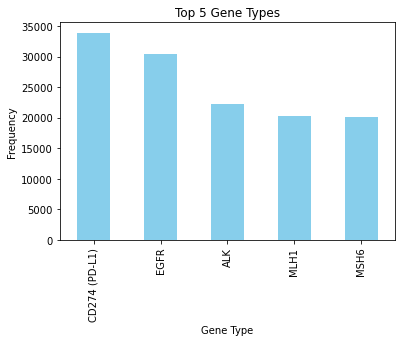

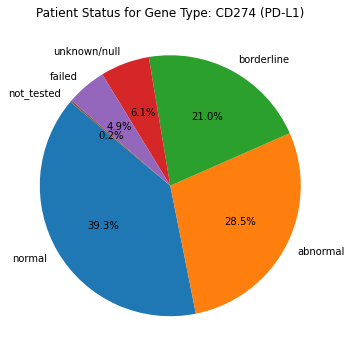

In [26]:
# top 5 gene types and take 1 gene type and according to this check how many patient gene status overall ts e.g normal, abnornal
# top 5 gene types
top_5_genes = uk_selected_gene_columns['GENE_DESC'].value_counts().head(5)

# bar plot for the top 5 gene types
top_5_genes.plot(kind='bar', color='skyblue')
plt.title('Top 5 Gene Types')
plt.xlabel('Gene Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()

selected_gene_type = top_5_genes.index[0]

selected_gene_df = uk_selected_gene_columns[uk_selected_gene_columns['GENE_DESC'] == selected_gene_type]
patient_counts = selected_gene_df['OVERALL_TS'].value_counts()
#show into pie chart
patient_counts = patient_counts[patient_counts > 1]
modified_labels = [label[2:] for label in patient_counts.index]
plt.figure(figsize=(6, 6))
plt.pie(patient_counts, labels=modified_labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Patient Status for Gene Type: {selected_gene_type}')


#plt.figure(figsize=(6, 6))
#plt.pie(patient_counts, labels=patient_counts.index, autopct='%1.1f%%', startangle=140)
#plt.title(f'Patient Status for Gene Type: {selected_gene_type}')


plt.show()

In [7]:
# top 10 methods used the most to test gene types gene 


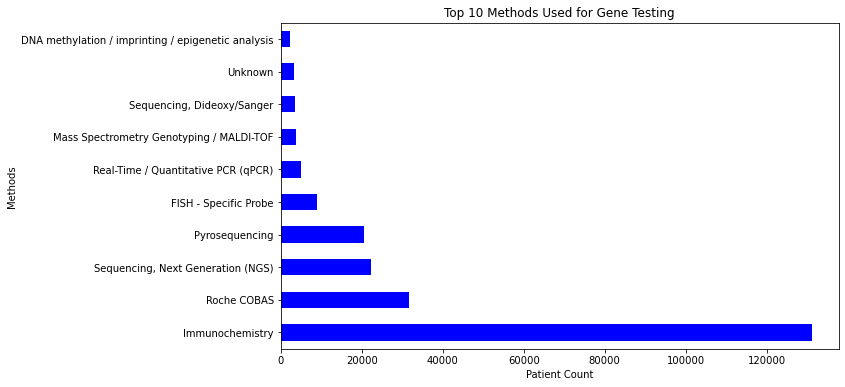

In [8]:
method_counts = uk_selected_gene_columns['METHODS'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
method_counts.plot(kind='barh', color='Blue')
plt.title('Top 10 Methods Used for Gene Testing')
plt.xlabel('Patient Count')
plt.ylabel('Methods')

# Show the chart
plt.show()



In [8]:
merged_data_dosage

,PATIENTID,RTTREATMENTMODALITY,RTACTUALDOSE,RTPRESCRIBEDDOSE,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE
0,10000008,5.0,35.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
1,10000008,5.0,35.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
2,10000008,5.0,35.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
3,10000008,5.0,35.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
4,10000008,5.0,35.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...
5843637,250002502,5.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
5843638,250002502,5.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
5843639,250002502,5.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
5843640,250002502,5.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05


Number of patients from the top 5 dosages:
Top 5 higher dosages: [60.0, 45.0, 40.0, 20.0, 8.0]
Total Patients: 3087935


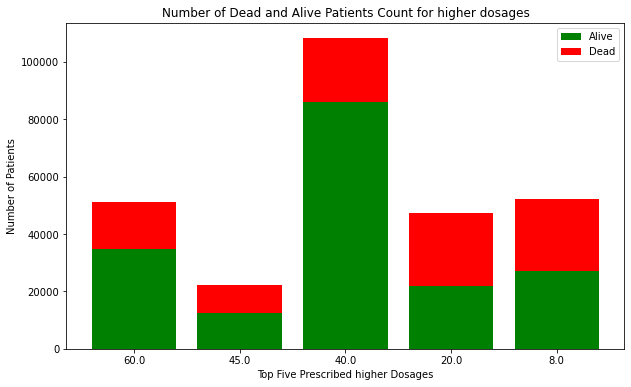

In [7]:
# 3.Analyse the top five mostly prescribed dosage and analyse how many patients are alive or dead according to these dosagselected_patientop_5_dos
merged_data_dosage = pd.merge(uk_selected_prescription_columns, uk_selected_patient_columns, on='PATIENTID')

top_five_unique_dosages1 = merged_data_dosage['RTPRESCRIBEDDOSE'].value_counts().head(5).index.tolist()

# Sort the top five unique dosages in descending order
top_five_unique_dosages1.sort(reverse=True)
selected_patients = merged_data_dosage[merged_data_dosage['RTPRESCRIBEDDOSE'].isin(top_five_unique_dosages1)]

# Get the unique patient IDs from the selected patients
unique_patient_ids = selected_patients['PATIENTID'].unique()

# Print the results.
print("Number of patients from the top 5 dosages:")
print("Top 5 higher dosages:",top_five_unique_dosages1  )
print("Total Patients:", len(selected_patients))



data = {
    'Dosage': top_five_unique_dosages1,
    'Alive Patients': [],
    'Dead Patients': []
}

# counts for alive and dead patients
for dosage in top_five_unique_dosages1:
    patients_for_dosage = selected_patients[selected_patients['RTPRESCRIBEDDOSE'] == dosage]
    alive_count = patients_for_dosage[patients_for_dosage['VITALSTATUS'] == 'A']['PATIENTID'].nunique()
    dead_count = patients_for_dosage[patients_for_dosage['VITALSTATUS'] == 'D']['PATIENTID'].nunique()
    data['Alive Patients'].append(alive_count)
    data['Dead Patients'].append(dead_count)

# Create a DataFrame from the data
df = pd.DataFrame(data)

# stacked bar chart

plt.figure(figsize=(10, 6))
x = range(len(top_five_unique_dosages1))
plt.bar(x, df['Alive Patients'], label='Alive', color='green')
plt.bar(x, df['Dead Patients'], bottom=df['Alive Patients'], label='Dead', color='red')
plt.xlabel("Top Five Prescribed higher Dosages")
plt.ylabel("Number of Patients")
plt.title("Number of Dead and Alive Patients Count for higher dosages")
plt.xticks(x, top_five_unique_dosages1)  # Set x-axis labels
plt.legend()

plt.show()







Bottom Five Dosages (ascending order): [1445.0, 748.0, 724.0, 700.0, 87.0]


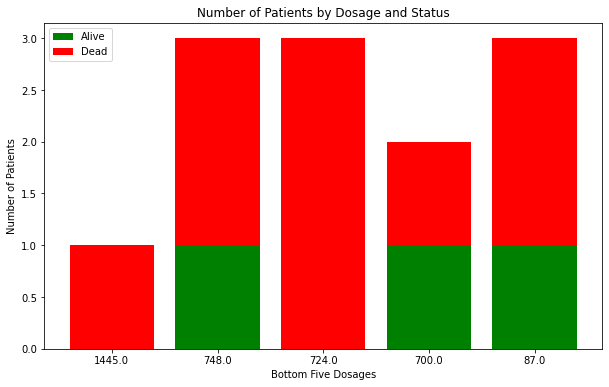

In [11]:
# lower 5 prescribed dosages and according to these dosages how many patients are dead and alive 

merged_data_dosage = pd.merge(uk_selected_prescription_columns, uk_selected_patient_columns, on='PATIENTID')
bottom_five_unique_dosages1 = merged_data_dosage['RTPRESCRIBEDDOSE'].value_counts().tail(5).index.tolist()

# Sort the top five unique dosages in descending order
bottom_five_unique_dosages1.sort(reverse=True)
# Print both top and bottom dosages

#print("Bottom Five Dosages (ascending order):", bottom_five_unique_dosages1)

selected_patients1 = merged_data_dosage[merged_data_dosage['RTPRESCRIBEDDOSE'].isin(bottom_five_unique_dosages1)]
unique_patient_ids = selected_patients1['PATIENTID'].unique()

data = {
    'Dosage': bottom_five_unique_dosages1,
    'Alive Patients': [],
    'Dead Patients': []
}

# Populate the counts for alive and dead patients
for dosage in bottom_five_unique_dosages1:
    patients_for_dosage = selected_patients1[selected_patients1['RTPRESCRIBEDDOSE'] == dosage]
    alive_count = patients_for_dosage[patients_for_dosage['VITALSTATUS'] == 'A']['PATIENTID'].nunique()
    dead_count = patients_for_dosage[patients_for_dosage['VITALSTATUS'] == 'D']['PATIENTID'].nunique()
    data['Alive Patients'].append(alive_count)
    data['Dead Patients'].append(dead_count)

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Create a stacked bar chart with the bottom five dosages on the x-axis
plt.figure(figsize=(10, 6))
x = range(len(bottom_five_unique_dosages1))
plt.bar(x, df['Alive Patients'], label='Alive', color='green')
plt.bar(x, df['Dead Patients'], bottom=df['Alive Patients'], label='Dead', color='red')
plt.xlabel("Bottom Five Dosages")
plt.ylabel("Number of Patients")
plt.title("Number of Patients by Dosage and Status")
plt.xticks(x, bottom_five_unique_dosages1)  # Set x-axis labels
plt.legend()

plt.show()

In [ ]:
#Prepare a dataset (.csv) with all lung cancer patients (SITE_ICD10_O2_3CHAR= C34) and their causes of death


C:\Users\poonam\AppData\Local\Temp/ipykernel_38984/746800317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_selected_patient_columns['VITALSTATUSDATE'] = pd.to_datetime(uk_selected_patient_columns['VITALSTATUSDATE'])


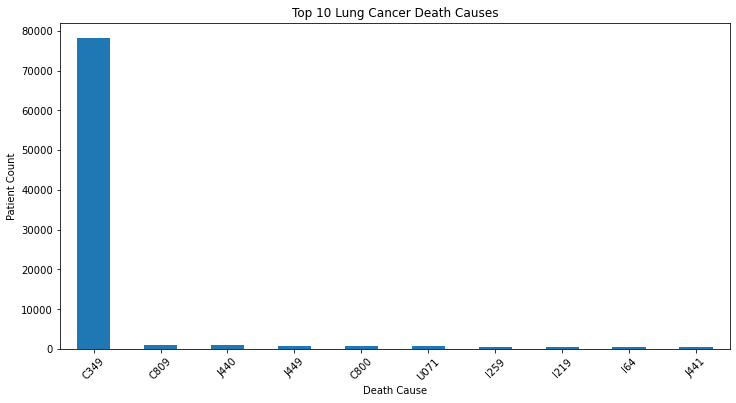

In [56]:

#Filtering data from 2016 to 2019
uk_selected_patient_columns['VITALSTATUSDATE'] = pd.to_datetime(uk_selected_patient_columns['VITALSTATUSDATE'])
start_date = '2016-01-01'
end_date = '2019-12-31'
mask2 = (uk_selected_patient_columns['VITALSTATUSDATE'] >= start_date) & (uk_selected_patient_columns['VITALSTATUSDATE'] <= end_date)

# Apply the mask to select data within the specified date range
selected_patient_2016_to_2019 = uk_selected_patient_columns[mask2]

merged_data = uk_selected_tumour_columns.merge(selected_patient_2016_to_2019, on='PATIENTID', how='inner')


lung_cancer_data = merged_data[merged_data['SITE_ICD10_O2_3CHAR'] == 'C34']
unique_data=lung_cancer_data.groupby('PATIENTID').first()
unique_data.to_csv('Lung Cancer data.csv', index=False)
# Split the 'DEATHCAUSECODE_UNDERLYING' column using a comma delimiter and created new DataFrame with each value in a separate row
split_causes = unique_data['DEATHCAUSECODE_UNDERLYING'].str.split(',')
lung_cancer_data_exploded = split_causes.explode().reset_index(drop=True)

# Count the occurrences of each cause of death
cause_counts = lung_cancer_data_exploded.value_counts()

# Get the top 10 causes of death
top_10_causes = cause_counts.head(10)

# Visualize the top causes of death in a bar graph

plt.figure(figsize=(12, 6))
top_10_causes.plot(kind='bar')
plt.title('Top 10 Lung Cancer Death Causes')
plt.xlabel('Death Cause')
plt.ylabel('Patient Count')
plt.xticks(rotation=45)
plt.show()




In [111]:
lung=pd.read_csv("Lung Cancer data.csv")

In [112]:
lung

,TUMOURID,GENDER,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,COMORBIDITIES_27_03,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_2.1,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE
0,10074892,1,2019-09-12,C34,"01,05,09",NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
1,10345024,1,2019-11-04,C34,04,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
2,10729904,1,2017-07-08,C34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
3,10213996,1,2018-07-29,C34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
4,11744263,1,2019-09-21,C34,"04,06,11,12",NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154880,10489089,1,2018-11-15,C34,13,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05
154881,11808521,1,2017-07-22,C34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,2018-11-29
154882,11077181,1,2019-10-18,C34,NaN,C099,NaN,NaN,NaN,NaN,C61,D,2021-03-20
154883,11318338,2,2019-09-11,C34,"13,17",C679,NaN,NaN,NaN,NaN,C679,D,2022-08-12


In [68]:
# Patients trend referred to radiotherapy. Analyse which tumour type is suggested for radiotherapy the most in the UK.
# Filtering Data (2016 t0 2019)
uk_selected_combined_columns['APPTDATE'] = pd.to_datetime(uk_selected_combined_columns['APPTDATE'])

# Create a boolean mask for rows within the desired date range
start_date = '2016-01-01'
end_date = '2019-12-31'
mask3 = (uk_selected_combined_columns['APPTDATE'] >= start_date) & (uk_selected_combined_columns['APPTDATE'] <= end_date)

# Apply the mask to select data within the specified date range
selected_combined_2016_to_2019 = uk_selected_combined_columns[mask3]

merged_data_radiotherapy = pd.merge(uk_selected_tumour_columns, selected_combined_2016_to_2019, on='PATIENTID')
top_10_tumor_types = merged_data_radiotherapy.groupby(['SITE_ICD10_O2', 'TUMOURID']).size().reset_index(name='Count')
top_10_tumor_types = top_10_tumor_types.groupby('SITE_ICD10_O2')['Count'].sum().nlargest(10).reset_index()
top_10_tumor_types = top_10_tumor_types.merge(icd_sheet[['Code', 'Description']], left_on='SITE_ICD10_O2', right_on='Code', how='left')


C:\Users\poonam\AppData\Local\Temp/ipykernel_38984/3125067939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_selected_combined_columns['APPTDATE'] = pd.to_datetime(uk_selected_combined_columns['APPTDATE'])


In [69]:
merged_data_radiotherapy = merged_data_radiotherapy.merge(icd_sheet, left_on='SITE_ICD10_O2', right_on='Code', how='left')




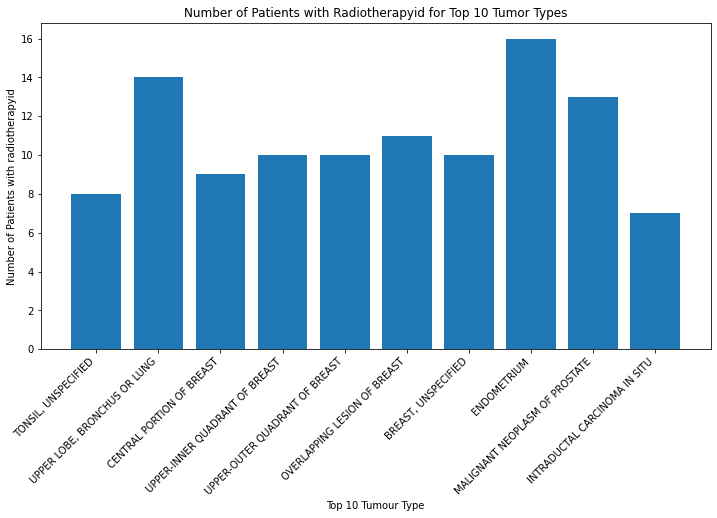

In [70]:
# Show the patient counts for the top 10 tumor types
filtered_data = merged_data_radiotherapy[merged_data_radiotherapy['SITE_ICD10_O2'].isin(top_10_tumor_types['SITE_ICD10_O2'])]
patient_counts = filtered_data.groupby(['SITE_ICD10_O2', 'TUMOURID','Description'])['RADIOTHERAPYEPISODEID'].nunique().reset_index(name='PatientCount')

plt.figure(figsize=(12, 6))

# Plot the vertical bar chart
plt.bar(patient_counts['Description'], patient_counts['PatientCount'])
# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Set labels and title
plt.xlabel('Top 10 Tumour Type')
plt.ylabel('Number of Patients with radiotherapyid')
plt.title('Number of Patients with Radiotherapyid for Top 10 Tumor Types')

# Show the chart
plt.show()

In [37]:
uk_selected_prescription_columns




,PATIENTID,RTTREATMENTMODALITY,RTACTUALDOSE,RTPRESCRIBEDDOSE,APPTDATE
0,10000008,5.0,35.0,35.0,2018-08-11
1,10000008,5.0,35.0,35.0,2018-08-12
2,10000008,5.0,35.0,35.0,2018-08-13
3,10000008,5.0,35.0,35.0,2018-08-17
4,10000008,5.0,35.0,35.0,2018-08-18
...,...,...,...,...,...
5843637,250002502,5.0,8.0,8.0,2022-07-24
5843638,250002502,5.0,8.0,8.0,2022-07-25
5843639,250002502,5.0,8.0,8.0,2022-07-26
5843640,250002502,5.0,8.0,8.0,2022-07-27


C:\Users\poonam\AppData\Local\Temp/ipykernel_38984/3207171824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_selected_prescription_columns['APPTDATE'] = pd.to_datetime(uk_selected_prescription_columns['APPTDATE'])
C:\Users\poonam\AppData\Local\Temp/ipykernel_38984/3207171824.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_selected_patient_columns['VITALSTATUSDATE'] = pd.to_datetime(uk_selected_patient_columns['VITALSTATUSDATE'])


Number of patients from the top 5 dosages:
Top 5 higher dosages: [60.0, 55.0, 40.0, 20.0, 8.0]
Total Patients: 532725
alive counts 16686


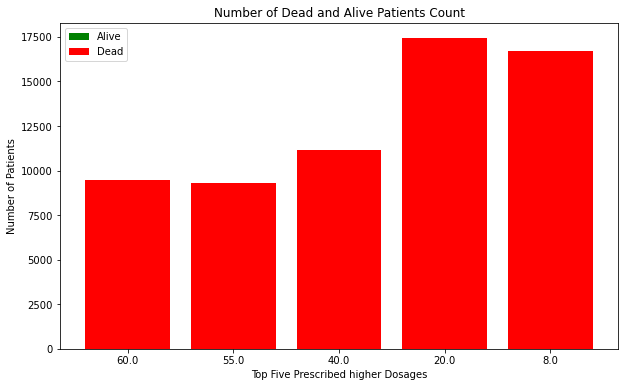

In [71]:
# 3.Analyse the top five mostly prescribed dosage and analyse how many patients are alive or dead according to these dosage selected_patientop_5_dos
uk_selected_prescription_columns['APPTDATE'] = pd.to_datetime(uk_selected_prescription_columns['APPTDATE'])

# Create a boolean mask for rows within the desired date range
start_date = '2016-01-01'
end_date = '2019-12-31'
mask = (uk_selected_prescription_columns['APPTDATE'] >= start_date) & (uk_selected_prescription_columns['APPTDATE'] <= end_date)

# Apply the mask to select data within the specified date range
selected_prescription_2016_to_2019 = uk_selected_prescription_columns[mask]

uk_selected_patient_columns['VITALSTATUSDATE'] = pd.to_datetime(uk_selected_patient_columns['VITALSTATUSDATE'])
#start_date1 = '2016-01-01'
#end_date1 = '2019-12-31'
mask1 = (uk_selected_patient_columns['VITALSTATUSDATE'] >= start_date) & (uk_selected_patient_columns['VITALSTATUSDATE'] <= end_date)

# Apply the mask to select data within the specified date range
selected_patient_2016_to_2019 = uk_selected_patient_columns[mask1]

merged_data_dosage = pd.merge(selected_prescription_2016_to_2019, selected_patient_2016_to_2019, on='PATIENTID')


top_five_unique_dosages1 = selected_data_2016_to_2019['RTPRESCRIBEDDOSE'].value_counts().head(5).index.tolist()

# Sort the top five unique dosages in descending order
top_five_unique_dosages1.sort(reverse=True)
selected_patients = selected_data_2016_to_2019[selected_data_2016_to_2019['RTPRESCRIBEDDOSE'].isin(top_five_unique_dosages1)]

# Get the unique patient IDs from the selected patients
unique_patient_ids = selected_patients['PATIENTID'].unique()

# Print the results.
print("Number of patients from the top 5 dosages:")
print("Top 5 higher dosages:",top_five_unique_dosages1  )
print("Total Patients:", len(selected_patients))



data = {
    'dosage': top_five_unique_dosages1,
    'Alive Patients': [],
    'Dead Patients': []
    #'emplty status': []
}

# counts for alive and dead patients
for dosage in top_five_unique_dosages1:
    patients_for_dosage = selected_patients[selected_patients['RTPRESCRIBEDDOSE'] == dosage]
    alive_count = patients_for_dosage[patients_for_dosage['VITALSTATUS'] == 'A']['PATIENTID'].nunique()
    dead_count = patients_for_dosage[patients_for_dosage['VITALSTATUS'] == 'D']['PATIENTID'].nunique()
    #no_count = patients_for_dosage[patients_for_dosage['VITALSTATUS'] == ' ']['PATIENTID'].nunique()
    data['Alive Patients'].append(alive_count)
    data['Dead Patients'].append(dead_count)
    #data['emplty status'].append(no_count)
print("alive counts",dead_count )
# Create a DataFrame from the data.
df = pd.DataFrame(data)

# stacked bar chart

plt.figure(figsize=(10, 6))
x = range(len(top_five_unique_dosages1))
plt.bar(x, df['Alive Patients'], label='Alive', color='green')
plt.bar(x, df['Dead Patients'], bottom=df['Alive Patients'], label='Dead', color='red')
plt.xlabel("Top Five Prescribed higher Dosages")
plt.ylabel("Number of Patients")
plt.title("Number of Dead and Alive Patients Count")
plt.xticks(x, top_five_unique_dosages1)  
plt.legend()

plt.show()

In [48]:
selected_patient_2016_to_2019

,PATIENTID,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,VITALSTATUS,VITALSTATUSDATE
57,10000058,"R688,R54,R418",NaN,NaN,"J449,I64,I714","J449,I64,I714",N390,D,2018-03-20
77,10000078,I259,I251,NaN,"I489,I500","I489,I500",I251,D,2019-04-02
83,10000084,I639,"I64,I639",NaN,G20,G20,I639,D,2017-03-18
110,10000111,I259,I259,NaN,I10,I10,I259,D,2019-06-19
140,10000141,J22,G309,NaN,N19,N19,J22,D,2019-12-30
...,...,...,...,...,...,...,...,...,...
1871571,250002510,C679,NaN,NaN,NaN,NaN,C679,D,2019-11-06
1871579,250002518,U071,NaN,NaN,E119,E119,C349,D,2019-10-17
1871589,250002528,C631,C73,NaN,"K929,Z932,I709","K929,Z932,I709",U071,D,2019-03-28
1871599,250002538,"C809,C786",NaN,NaN,NaN,NaN,C060,D,2016-05-28
